In [28]:
import pandas as pd 
import numpy as np 
import nltk 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [29]:
nltk.download('names')
male_names = nltk.corpus.names.words('male.txt')
female_names = nltk.corpus.names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [30]:
df_male = pd.DataFrame({'name':np.array(male_names), 'sex':0})
df_female = pd.DataFrame({'name':np.array(female_names), 'sex':1})
print(df_male.shape)
df_male.head()

(2943, 2)


,name,sex
0,Aamir,0
1,Aaron,0
2,Abbey,0
3,Abbie,0
4,Abbot,0


In [31]:
print(df_female.shape)
df_female.head()

(5001, 2)


,name,sex
0,Abagael,1
1,Abagail,1
2,Abbe,1
3,Abbey,1
4,Abbi,1


In [32]:
df = pd.concat([df_male, df_female])
print(df.shape)
df.head()

(7944, 2)


,name,sex
0,Aamir,0
1,Aaron,0
2,Abbey,0
3,Abbie,0
4,Abbot,0


In [33]:
df['first'] = df.name.apply(lambda x : x[0])
df.head()

,name,sex,first
0,Aamir,0,A
1,Aaron,0,A
2,Abbey,0,A
3,Abbie,0,A
4,Abbot,0,A


In [34]:
df['last'] = df.name.apply(lambda x : x[-1])
df.head()

,name,sex,first,last
0,Aamir,0,A,r
1,Aaron,0,A,n
2,Abbey,0,A,y
3,Abbie,0,A,e
4,Abbot,0,A,t


In [35]:
df['len'] = df.name.apply(lambda x : len(x))
df.head()

,name,sex,first,last,len
0,Aamir,0,A,r,5
1,Aaron,0,A,n,5
2,Abbey,0,A,y,5
3,Abbie,0,A,e,5
4,Abbot,0,A,t,5


In [36]:
Y = df.sex
df = df.drop(['name', 'sex'], axis=1)
X = pd.get_dummies(df)
X.head()

,len,first_A,first_B,first_C,first_D,first_E,first_F,first_G,first_H,first_I,...,last_p,last_r,last_s,last_t,last_u,last_v,last_w,last_x,last_y,last_z
0,5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=100, max_features=10)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

In [40]:
print('effectiveness:', rfc.score(X_test, Y_test))

effectiveness: 0.7646812080536913


In [41]:
result = pd.DataFrame({'value':rfc.feature_importances_, 'name':X.columns})
result.head()

,name,value
0,len,0.197853
1,first_A,0.012529
2,first_B,0.010239
3,first_C,0.016412
4,first_D,0.010647


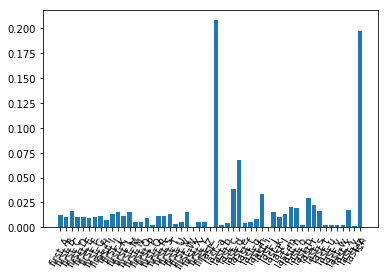

In [42]:
plt.bar(result['name'], result['value'])
plt.xticks(rotation=60)
plt.show()